# **Exploratory Data Analysis (EDA) of Air Quality Index (AQI) in Major Indian Cities**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load AQI dataset
df = pd.read_csv("/content/Final_AQI.csv", parse_dates=['Date'])
df.head()

,Date,PM2.5,PM10,NO2,CO,Ozone,City,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_Ozone,AQI
0,2024-01-02,104.79,146.30,44.64,1.35,53.47,Indore,248.076207,131.098658,55.573333,64.611111,53.47,248.076207
1,2024-01-04,114.69,161.47,39.49,1.54,38.37,Indore,281.872759,141.178054,49.362500,74.955556,38.37,281.872759
2,2024-01-06,88.81,122.08,48.94,1.53,43.09,Indore,195.937586,115.006174,60.975897,74.411111,43.09,195.937586
3,2024-01-07,66.61,93.93,46.25,1.25,30.89,Indore,120.151379,93.930000,57.596154,59.166667,30.89,120.151379
4,2024-01-08,94.56,141.99,51.93,1.64,49.13,Indore,213.153103,128.234966,64.732564,80.400000,49.13,213.153103


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8252 non-null   datetime64[ns]
 1   PM2.5      8252 non-null   float64       
 2   PM10       8252 non-null   float64       
 3   NO2        8252 non-null   float64       
 4   CO         8252 non-null   float64       
 5   Ozone      8252 non-null   float64       
 6   City       8252 non-null   object        
 7   AQI_PM2.5  8252 non-null   float64       
 8   AQI_PM10   8252 non-null   float64       
 9   AQI_NO2    8252 non-null   float64       
 10  AQI_CO     8252 non-null   float64       
 11  AQI_Ozone  8252 non-null   float64       
 12  AQI        8252 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 838.2+ KB


In [27]:
df.describe()

,Date,PM2.5,PM10,NO2,CO,Ozone,AQI_PM2.5,AQI_PM10,AQI_NO2,AQI_CO,AQI_Ozone,AQI
count,8252,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000,8252.000000
mean,2023-06-07 17:33:07.590886912,47.140606,111.592569,38.939124,1.053259,26.334747,87.105349,102.558761,47.247326,48.337511,26.374552,118.505874
min,2022-01-01 00:00:00,1.200000,4.946429,0.100000,0.000000,0.280000,2.000000,4.946429,0.125000,0.000000,0.280000,12.450000
25%,2022-09-24 00:00:00,20.842813,54.148958,13.125148,0.500000,11.462196,34.738021,54.148958,16.406434,25.000000,11.462196,60.025000
50%,2023-06-20 00:00:00,35.920000,87.692708,25.420000,0.744521,21.669792,59.313103,87.692708,31.775000,37.226066,21.669792,96.107292
75%,2024-02-18 00:00:00,57.998698,137.969808,51.062500,1.372370,35.997231,96.618490,125.563832,63.642628,65.829022,35.997231,145.079052
max,2024-10-20 00:00:00,424.810000,598.950000,281.830000,8.707407,181.700000,470.105181,499.384911,301.690504,183.801688,233.238462,499.384911
std,NaN,42.148336,88.505692,39.502543,0.807615,19.561330,82.616933,74.395676,45.196637,30.811572,19.799977,84.725075


## **AQI Trend Over Time**

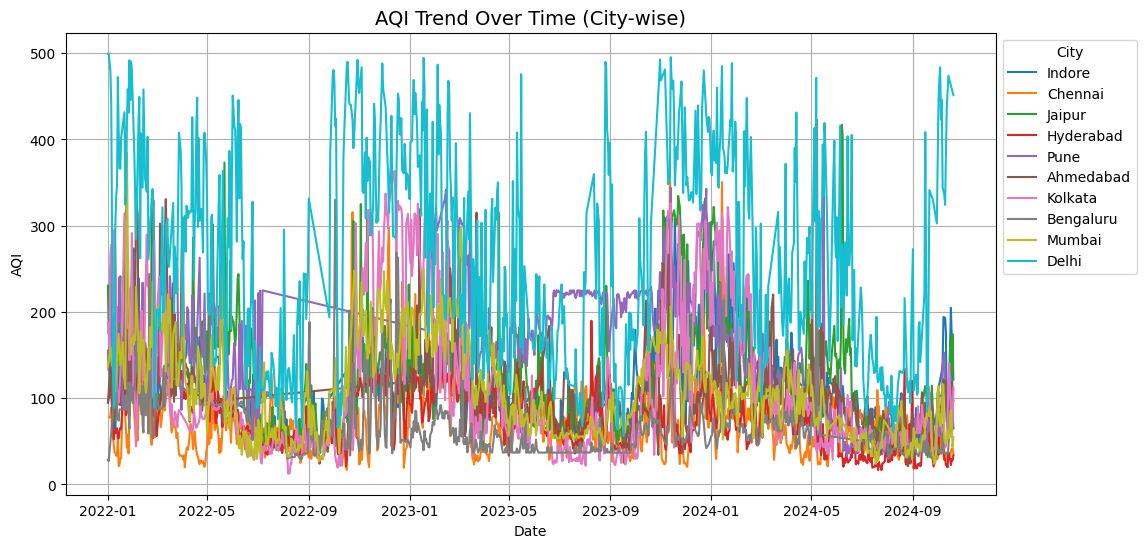

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AQI', hue='City', data=df, palette="tab10")
plt.title("AQI Trend Over Time (City-wise)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend(title="City", bbox_to_anchor=(1,1))
plt.grid()
plt.show()

**Observation:** AQI fluctuates over time, with some cities showing a clear increasing trend, especially during winter months.

**Insight:** This indicates seasonal pollution variations, possibly due to weather conditions and human activities.

## **Moving Averages (Seasonality)**

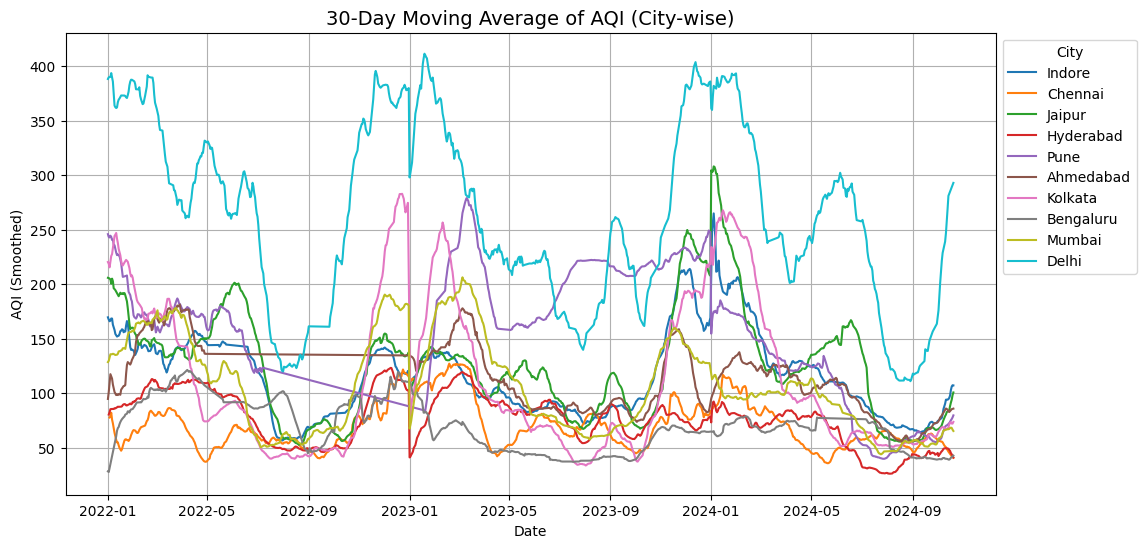

In [29]:
# Calculate 30-day moving average for AQI
df['AQI_MA'] = df.groupby('City')['AQI'].transform(lambda x: x.rolling(30, min_periods=1).mean())

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AQI_MA', hue='City', data=df, palette="tab10")
plt.title("30-Day Moving Average of AQI (City-wise)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("AQI (Smoothed)")
plt.legend(title="City", bbox_to_anchor=(1,1))
plt.grid()
plt.show()

**Observation:** The 30-day moving average smooths out fluctuations, revealing periodic AQI increases.

**Insight:** There are seasonal cycles where AQI spikes, likely linked to weather, industrial activities, and vehicular pollution.

## **AQI Distribution (City-wise)**

<ipython-input-30-816a593862b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="AQI", data=df, palette="coolwarm")


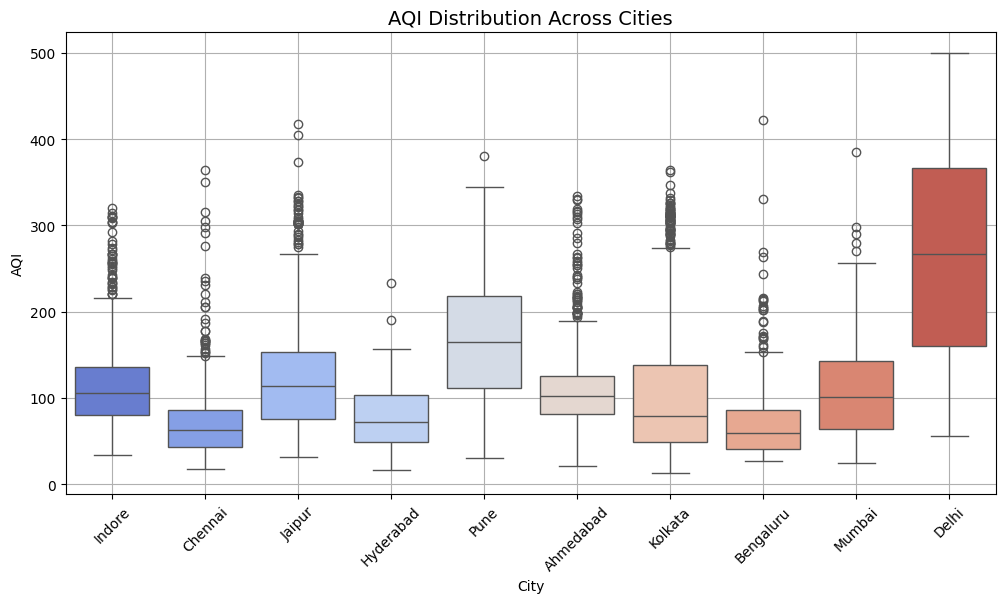

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="AQI", data=df, palette="coolwarm")
plt.title("AQI Distribution Across Cities", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Observation:** Some cities have consistently higher AQI values, while others show large variations.

**Insight:** Cities like Delhi and Mumbai show persistently high AQI, indicating chronic pollution problems, while others have occasional spikes.

## **Decomposing AQI (Trend, Seasonality, Residuals)**

### **Delhi**

<Figure size 1200x800 with 0 Axes>

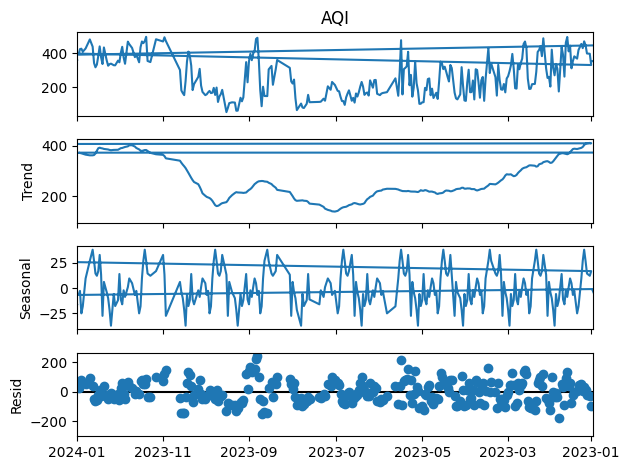

In [31]:
city = "Delhi"  # Choose a city
city_df = df[df["City"] == city].set_index("Date")  # Filter city data

decomposition = seasonal_decompose(city_df['AQI'], model='additive', period=30)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

### **Mumbai**

<Figure size 1200x800 with 0 Axes>

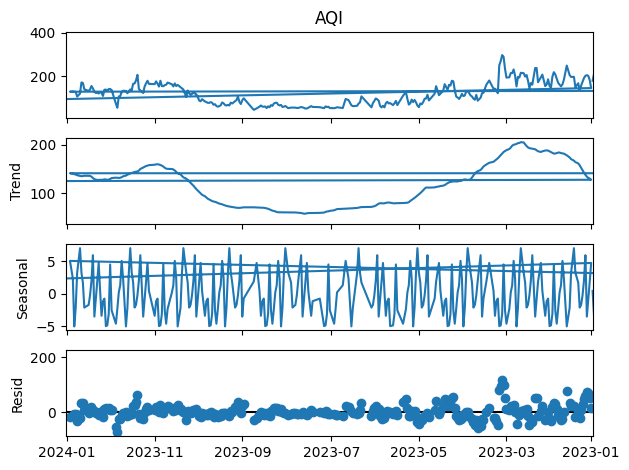

In [36]:
city = "Mumbai"  # Choose a city
city_df = df[df["City"] == city].set_index("Date")  # Filter city data

decomposition = seasonal_decompose(city_df['AQI'], model='additive', period=30)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

### **Bengaluru**

<Figure size 1200x800 with 0 Axes>

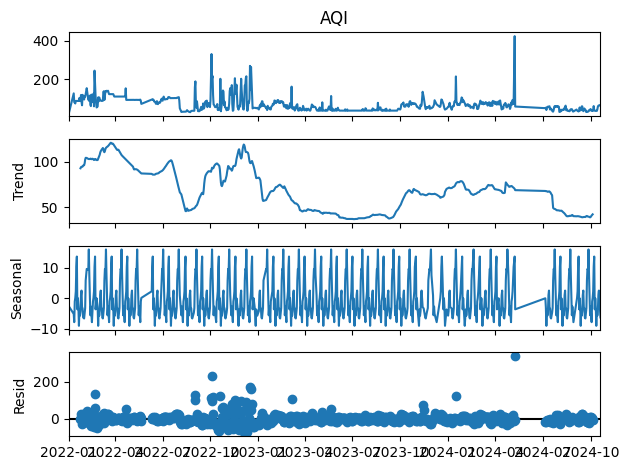

In [35]:
city = "Bengaluru"  # Choose a city
city_df = df[df["City"] == city].set_index("Date")  # Filter city data

decomposition = seasonal_decompose(city_df['AQI'], model='additive', period=30)

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

**Observation:** A strong upward trend is visible in some cities, and seasonal patterns are noticeable.

**Insight:** AQI prediction models should consider both long-term trends and seasonal effects for better accuracy.

## **Correlation Between AQI & Pollutants**

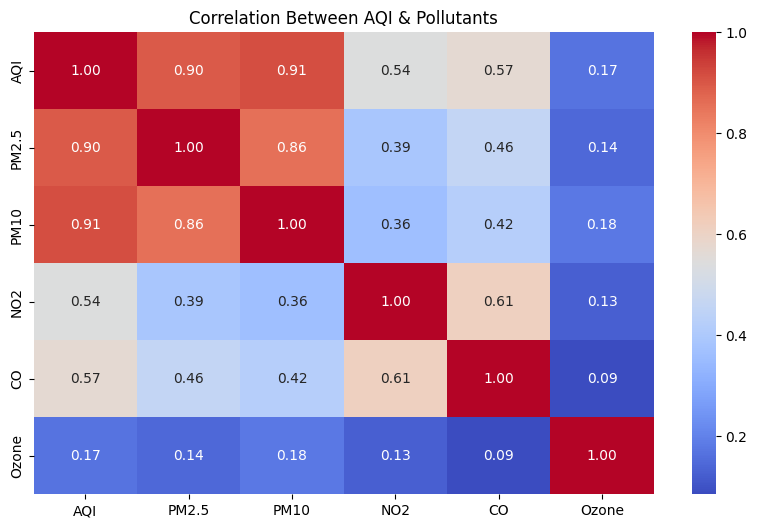

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'Ozone']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between AQI & Pollutants")
plt.show()

**Observation:** PM2.5 and PM10 show the highest correlation with AQI, followed by NO₂. CO and Ozone have lower correlations.

**Insight:** Fine particulate matter (PM2.5 & PM10) is the major contributor to air pollution, likely from vehicular emissions and construction dust.

## **Autocorrelation & Partial Autocorrelation**

<Figure size 1200x500 with 0 Axes>

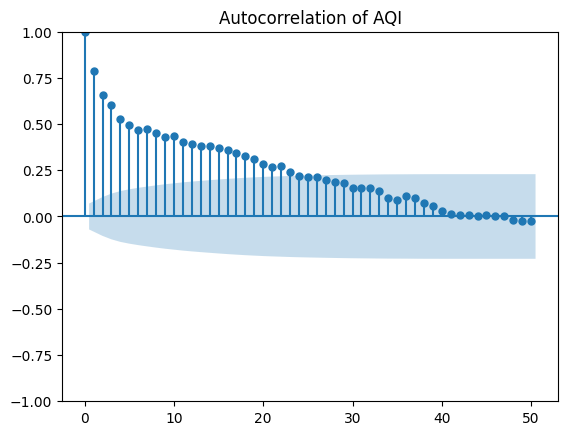

<Figure size 1200x500 with 0 Axes>

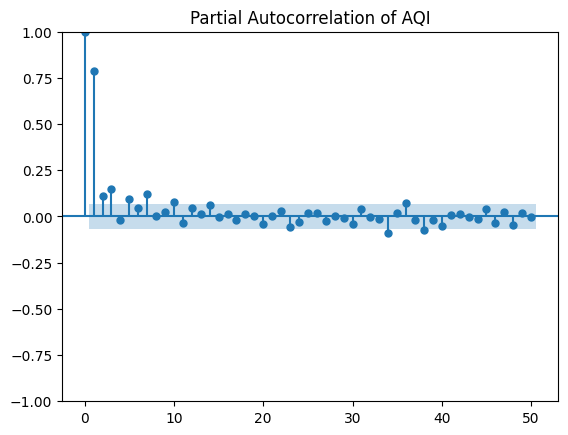

In [33]:
plt.figure(figsize=(12, 5))
plot_acf(city_df['AQI'], lags=50)
plt.title("Autocorrelation of AQI")
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(city_df['AQI'], lags=50)
plt.title("Partial Autocorrelation of AQI")
plt.show()

**Observation:** AQI values are highly correlated with past values, with a significant autocorrelation up to 30-50 days.

**Insight:** LSTM models should use past 30-50 days of AQI data as input features for forecasting.

## **City-Wise Pollution Ranking**

<ipython-input-34-a44a82e8bb66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette="Reds_r")


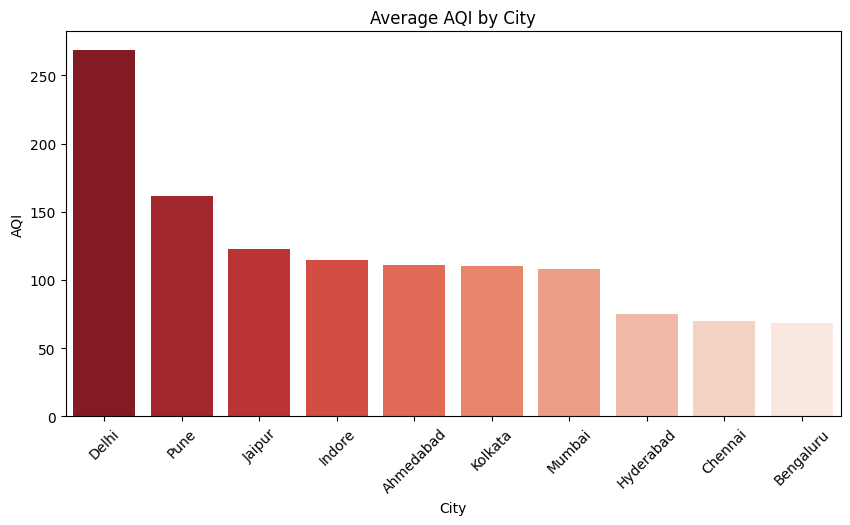

In [34]:
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette="Reds_r")
plt.title("Average AQI by City")
plt.xticks(rotation=45)
plt.ylabel("AQI")
plt.show()

**Observation:** Cities like Delhi, Kolkata, and Mumbai have the highest AQI, while others like Bangalore are relatively cleaner.

**Insight:** Policy makers should focus on stricter pollution controls in highly polluted cities.

## **Conclusion**


* AQI trends are highly seasonal, with winter months showing higher pollution.
* PM2.5 & PM10 are the biggest contributors to air pollution.
* Forecasting models should use at least 30-50 days of past data for accurate predictions.
* Policy actions should target high-pollution cities for effective air quality management.




